# Conjunto de Dados para Predição de Preços de Veículos

## Informações Básicas
- **Fonte:** [Kaggle](https://www.kaggle.com/datasets/metawave/vehicle-price-prediction)
- **Última atualização:** 2023
- **Tamanho aproximado:** 5.000 registros
- **Formato:** CSV (`vehicle_price_prediction.csv`)

## Descrição
O dataset contém informações detalhadas sobre veículos usados e seus respectivos preços, sendo ideal para análise exploratória e modelagem de previsão de preço.

## Principais Colunas

| Coluna | Descrição | Exemplo |
|--------|-----------|---------|
| `make` | Marca do veículo | Toyota, BMW, Ford |
| `model` | Modelo do veículo | Corolla, X5, F-150 |
| `year` | Ano de fabricação | 2018, 2020, 2015 |
| `transmission` | Tipo de câmbio | manual/automático |
| `mileage` | Quilometragem percorrida | 45,000 km |
| `fuel_type` | Tipo de combustível | gasolina, diesel, híbrido, elétrico |
| `engine_size` | Tamanho do motor (litros) | 2.0L, 1.6L |
| `owner_count` | Quantidade de donos anteriores | 1, 2, 3 |
| `accident_history` | Histórico de acidentes | Major/Minor/N.A |
| `price` | Preço atual do veículo (USD) | $15,000 |

## Objetivo da Análise

Explorar e compreender os fatores que mais influenciam o preço de veículos usados, permitindo insights valiosos para:

### Aplicações Práticas
- **Avaliação de revendas e concessionárias**
- **Estimativas de depreciação** 
- **Estratégias de precificação**
- **Compra inteligente de veículos**

### Possíveis Análises
- Correlação entre quilometragem e preço
- Impacto do histórico de acidentes na valorização
- Variação de preço por marca e modelo
- Influência do tipo de combustível no valor de revenda


# Análise Exploratória de Dados de Filmes do IMDb

## 1. Apresentação dos Dados

In [31]:
import pandas as pd
from IPython.display import display 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

data = pd.read_csv('../data/vehicle_price_prediction.csv', sep=',')

print("=== APRESENTAÇÃO DOS DADOS ===")
print(f"Total de veículos: {len(data)}")
print(f"Colunas disponíveis: {len(data.columns)}")
print(f"Período dos veículos: {data['year'].min()} - {data['year'].max()}")
print(f"Faixa de preços: ${data['price'].min():.2f} - ${data['price'].max():.2f}")

display(data.head())

=== APRESENTAÇÃO DOS DADOS ===
Total de veículos: 500000
Colunas disponíveis: 20
Período dos veículos: 2000 - 2025
Faixa de preços: $1500.00 - $91259.31


,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,NaN,Dealer,Excellent,EX,9,20433.67,0.04,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,15776.20,0.04,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,NaN,Dealer,Excellent,Touring,9,11466.56,0.04,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,NaN,Private,Good,Base,9,13209.89,0.04,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.14,0.04,8151.30


## 2. Processamento dos Dados

### 2.1. Limpeza Inicial

Nesta etapa foram executadas ações básicas de preparação do dataset:

- **Remoção de colunas irrelevantes para a análise**, como `seller_type`, `brand_popularity`, para reduzir ruído na análise.
- **Verificação de valores faltantes**, identificando colunas com porcentagem de dados ausentes que podem exigir tratamento posterior.

In [32]:
print("Removendo as colunas:")
df = data.copy()
df.columns = df.columns.str.strip()
df = df.drop(["seller_type", "brand_popularity"], axis=1)
df.info()

Removendo as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   make              500000 non-null  object 
 1   model             500000 non-null  object 
 2   year              500000 non-null  int64  
 3   mileage           500000 non-null  int64  
 4   engine_hp         500000 non-null  int64  
 5   transmission      500000 non-null  object 
 6   fuel_type         500000 non-null  object 
 7   drivetrain        500000 non-null  object 
 8   body_type         500000 non-null  object 
 9   exterior_color    500000 non-null  object 
 10  interior_color    500000 non-null  object 
 11  owner_count       500000 non-null  int64  
 12  accident_history  124584 non-null  object 
 13  condition         500000 non-null  object 
 14  trim              500000 non-null  object 
 15  vehicle_age       500000 non-null  int64  
 16

## 2.2 Verificação de Dados Faltantes

### Objetivo
Identificar e quantificar a presença de valores nulos no dataset após a limpeza inicial.

### Método
- Calcula a porcentagem de valores faltantes por coluna
- Ordena as colunas em ordem decrescente de dados ausentes
- Filtra para mostrar apenas colunas com valores faltantes (> 0%)


In [33]:
print("\nDados faltantes por coluna:")
missing_data = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print(missing_data[missing_data > 0])


Dados faltantes por coluna:
accident_history   75.08
dtype: float64


## 2.3 Análise da Distribuição de Histórico de Acidentes

### Objetivo
Compreender a distribuição dos valores na coluna `accident_history`, incluindo a frequência de cada categoria e a presença de valores nulos.

### Método
- Utiliza a função `value_counts()` para contar a ocorrência de cada valor único na coluna
- Permite avaliar o balanceamento das categorias e a proporção de dados faltantes

In [34]:
print("Analisando distribuição do histórico de acidentes:")
df['accident_history'].value_counts(dropna=False)

Analisando distribuição do histórico de acidentes:


accident_history
NaN      375416
Minor     99709
Major     24875
Name: count, dtype: int64

### 2.4 Tratamento de Dados Faltantes
#### Objetivo
Preencher os valores ausentes na coluna `accident_history` e observar possíveis dados faltantes no dataset.
#### Método
- substituindo os campos 'NAN' por 'N.A'
- exibindo a soma dos valores nulos

In [51]:
print("Quantidade de dados faltantes para cada coluna")
df['accident_history'] = df['accident_history'].fillna("N.A")
df.isnull().sum()


Quantidade de dados faltantes para cada coluna


make                0
model               0
year                0
mileage             0
engine_hp           0
transmission        0
fuel_type           0
drivetrain          0
body_type           0
exterior_color      0
interior_color      0
owner_count         0
accident_history    0
condition           0
trim                0
vehicle_age         0
mileage_per_year    0
price               0
age                 0
group               0
dtype: int64

## 2.5 Análise Estatística Descritiva dos Dados Numéricos

### Objetivo
Gerar um resumo estatístico abrangente das variáveis numéricas do dataset para compreender sua distribuição, tendência central e dispersão.

### Método
- método describe()

In [36]:
print("Describe dos dados numéricos:")
df.describe()

Describe dos dados numéricos:


,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,price
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00
mean,2017.45,112646.71,235.69,3.48,7.59,14539.98,20337.70
std,3.90,72095.15,93.66,1.54,3.83,6106.91,13650.44
min,2000.00,500.00,90.00,1.00,1.00,34.19,1500.00
25%,2015.00,57663.75,162.00,2.00,5.00,10490.75,10326.15
50%,2018.00,103338.00,215.00,4.00,7.00,14684.50,17874.32
75%,2020.00,157902.25,300.00,5.00,10.00,18690.22,27627.98
max,2025.00,300000.00,576.00,5.00,25.00,51046.00,91259.31


### 2.6 Verificação de Dados Duplicados

#### Objetivo
Identificar e examinar registros duplicados no dataset que possam distorcer análises estatísticas e modelos preditivos.

#### Método
- método duplicated()

In [37]:
print("Verificar dados duplicados")
df.loc[df.duplicated()]

Verificar dados duplicados


,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,condition,trim,vehicle_age,mileage_per_year,price


### 2.7 Análise de Valores Únicos por Coluna

#### Objetivo
Identificar a cardinalidade de cada coluna do dataset, ou seja, quantos valores distintos existem em cada variável, fornecendo insights sobre a diversidade e natureza dos dados.

#### Método
- método nunique()

In [38]:
print("Valores unicos")
df.nunique()

Valores unicos


make                    25
model                  105
year                    26
mileage             213419
engine_hp              470
transmission             2
fuel_type                3
drivetrain               3
body_type                7
exterior_color           6
interior_color           4
owner_count              5
accident_history         3
condition                3
trim                     6
vehicle_age             25
mileage_per_year    323893
price               449654
dtype: int64

### 2.8 Análise de Distribuição com Boxplots

#### Objetivo
Visualizar a distribuição, dispersão e presença de outliers em todas as variáveis numéricas do dataset através de boxplots individuais, permitindo uma análise comparativa rápida das características dos dados.

#### Método
- método plot()

year                   Axes(0.125,0.11;0.0945122x0.77)
mileage             Axes(0.238415,0.11;0.0945122x0.77)
engine_hp           Axes(0.351829,0.11;0.0945122x0.77)
owner_count         Axes(0.465244,0.11;0.0945122x0.77)
vehicle_age         Axes(0.578659,0.11;0.0945122x0.77)
mileage_per_year    Axes(0.692073,0.11;0.0945122x0.77)
price               Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

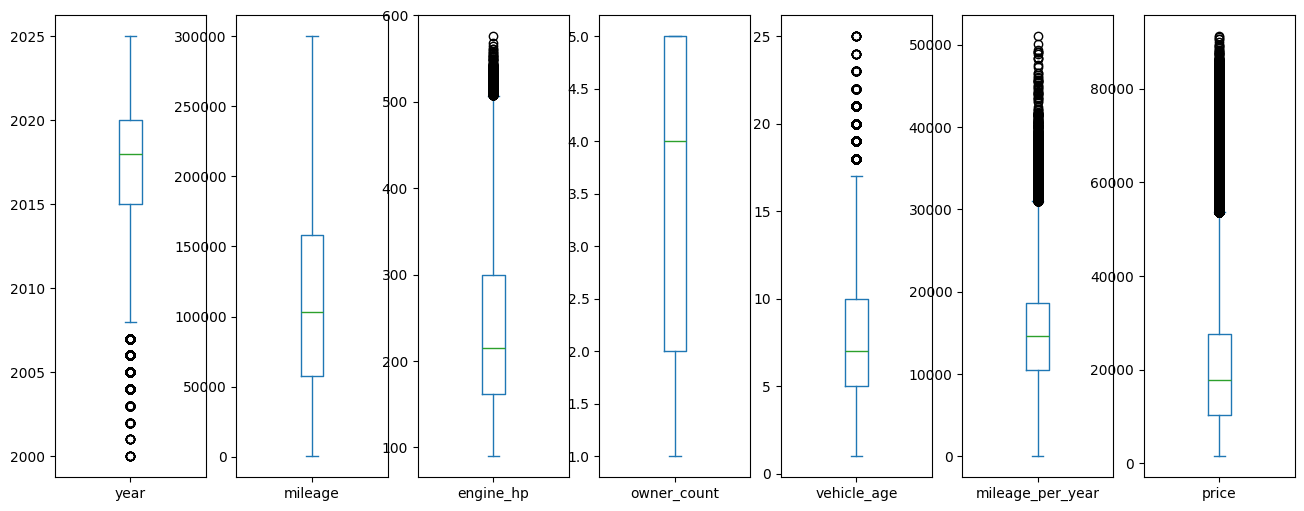

In [39]:
df.plot(kind='box', figsize=(16,6), subplots=True)

### 3.0 Identificação de Veículos de Alto Valor

#### Objetivo
Identificar e examinar os registros de veículos com preços excepcionalmente elevados (acima de $90,000) para entender as características que justificam esses valores premium no mercado.

#### Método
- metodo display como argumento que seguem abaixo

In [40]:
display(df[df['price'] >= 90000])

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,condition,trim,vehicle_age,mileage_per_year,price
203728,Porsche,911,2024,15856,466,Manual,Diesel,FWD,SUV,Blue,Black,4,N.A,Excellent,Limited,1,15856.00,90693.67
329372,Porsche,Cayenne,2025,1615,406,Manual,Gasoline,RWD,SUV,Red,Brown,1,N.A,Excellent,Base,1,1615.00,91259.31
402389,Porsche,Macan,2025,4864,473,Automatic,Electric,RWD,SUV,Black,Gray,1,N.A,Excellent,Sport,1,4864.00,90629.41
454567,Porsche,911,2025,2834,453,Manual,Gasoline,AWD,SUV,Blue,Beige,1,N.A,Excellent,Touring,1,2834.00,91009.40


### 3.1 Top 10 Veículos Mais Caros e Mais Baratos do Dataset

#### Objetivo
Identificar e analisar os 10 veículos com os maiores preços de venda no dataset, examinando as características que os posicionam no segmento premium do mercado automotivo.

#### Método
- método loc() com argumento ascending = False

In [41]:
df.loc[:, ['make','model', 'year', 'mileage', 'price']].sort_values(by='price', ascending = False).head(10)

,make,model,year,mileage,price
329372,Porsche,Cayenne,2025,1615,91259.31
454567,Porsche,911,2025,2834,91009.40
203728,Porsche,911,2024,15856,90693.67
402389,Porsche,Macan,2025,4864,90629.41
139445,Porsche,Cayenne,2024,3123,89961.19
472598,Porsche,911,2024,18209,89395.88
498401,Porsche,Panamera,2023,25172,89309.42
333440,Porsche,Cayenne,2025,1200,89178.64
206547,Porsche,Macan,2024,21033,88840.82
152220,Porsche,Panamera,2025,4205,88743.78


- método loc() com argumento ascending = True

In [42]:
df.loc[:, ['make','model', 'year', 'mileage', 'price']].sort_values(by='price', ascending = True).head(10)

,make,model,year,mileage,price
38576,Mazda,Mazda3,2013,295579,1500.00
296085,Subaru,Impreza,2012,226972,1500.00
16628,GMC,Yukon,2010,285503,1500.00
223363,Nissan,Titan,2016,269272,1500.00
113456,Honda,CR-V,2006,175878,1500.00
223339,Ford,Mustang,2011,300000,1500.00
223341,Jeep,Compass,2009,300000,1500.00
315969,Hyundai,Sonata,2009,300000,1500.00
326199,Chrysler,300,2007,253035,1500.00
38550,Honda,Odyssey,2014,256756,1500.00


### 3.2 Distribuição de Veículos por Ano de Fabricação

#### Objetivo
Analisar a distribuição temporal dos veículos presentes no dataset, identificando os anos de fabricação mais representados e compreendendo a composição etária da frota analisada.

#### Método
- Contagem por Ano: df['year'].value_counts() - Calcula a frequência de veículos por ano
- Ordenação Cronológica: .sort_index() - Organiza os anos em ordem crescente
- Gráfico de Barras: .plot(kind='bar') - Representação visual adequada para dados categóricos ordinais

Text(0, 0.5, 'Carros fabricados')

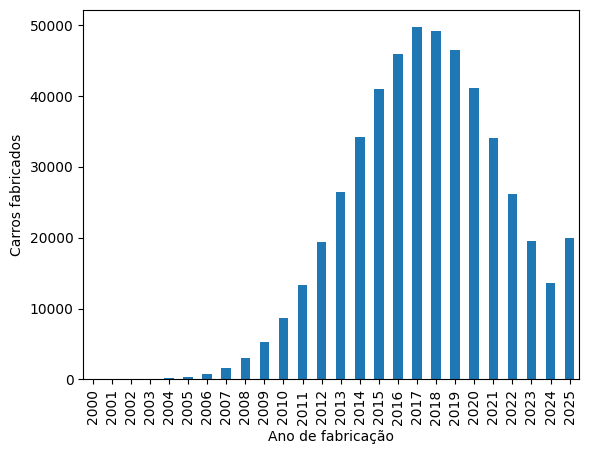

In [43]:
ax = df['year'].value_counts().sort_index().plot(kind='bar')

ax.set_xlabel('Ano de fabricação')
ax.set_ylabel('Carros fabricados')

### 3.3 Análise do Preço Médio por Ano de Fabricação

#### Objetivo
Analisar a evolução temporal do valor de mercado dos veículos através do cálculo do preço médio por ano de fabricação, identificando tendências de valorização e depreciação ao longo do tempo.

#### Método
- Agrupamento por ano: groupby('year') - Organiza os dados por ano de fabricação
- Cálculo da média: ['price'].mean() - Calcula o preço médio para cada ano
- Ordenação cronológica: .sort_index() - Mantém a sequência temporal correta
- Tamanho do gráfico: figsize=(12,6) - Dimensões adequadas para visualização clara
- Gráfico de barras: Representação ideal para comparar valores entre categorias discretas

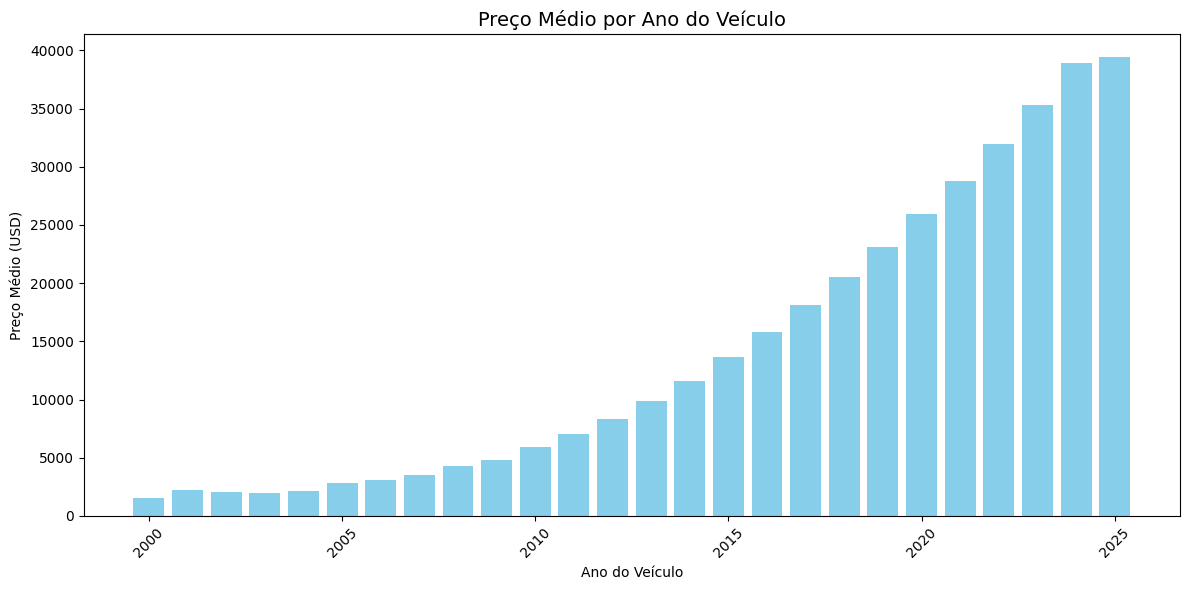

In [44]:
# Agrupa por ano e calcula a média dos preços
preco_medio_por_ano = df.groupby('year')['price'].mean().sort_index()

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(preco_medio_por_ano.index, preco_medio_por_ano.values, color='skyblue')

plt.title("Preço Médio por Ano do Veículo", fontsize=14)
plt.xlabel("Ano do Veículo")
plt.ylabel("Preço Médio (USD)")
plt.xticks(rotation=45)  # gira os anos para melhor visualização
plt.tight_layout()
plt.show()

### Análise do Impacto do Número de Donos no Preço por Marca

#### Pergunta de Pesquisa
**Como o número de proprietários anteriores influencia o preço médio dos veículos nas principais marcas do mercado?**

#### Propósito e Benefícios
- **Identificar o padrão de desvalorização** baseado no histórico de propriedade por marca
- **Compreender a percepção de valor** do consumidor em relação a veículos com múltiplos donos
- **Estabelecer métricas de precificação** que considerem o fator "número de proprietários"
- **Orientar estratégias de compra e venda** baseadas na sensibilidade de cada marca à rotatividade de donos

#### Ações Recomendadas

#### Para Compradores
- **Priorizar veículos com menor número de donos** em marcas premium onde este fator impacta significativamente o preço
- **Avaliar o trade-off** entre preço e número de donos em marcas onde a diferença é menos acentuada
- **Solicitar histórico completo de propriedade** como parte do processo de due diligence

#### Para Vendedores e Concessionárias
- **Destacar veículos com único dono** como valor agregado, especialmente em marcas de luxo
- **Desenvolver certificações de procedência** para veículos com histórico de propriedade limitado
- **Estabelecer políticas de precificação diferenciadas** baseadas no número de proprietários anteriores

#### Para Avaliadores e Financiadoras
- **Incorporar o fator "número de donos"** nos modelos de valuation para marcas sensíveis a este critério
- **Ajustar limites de financiamento** considerando a desvalorização por rotatividade de propriedade
- **Desenvolver scores de risco** baseados na estabilidade de propriedade do veículo

#### Insights Estratégicos

#### Comportamento do Consumidor
- **Percepção de qualidade**: Veículos com menos donos são associados a melhor manutenção e cuidados
- **Confiança na procedência**: Histórico de propriedade limitado aumenta a confiança do comprador
- **Valorização da documentação**: Transparência no histórico compensa parcialmente a desvalorização

#### Implicações de Mercado
- **Oportunidade de nicho**: Mercado específico para veículos "single-owner" com prêmio de preço
- **Importância da documentação**: Histórico completo mitiga parte da desvalorização por múltiplos donos
- **Estratégias de branding**: Marcas podem se posicionar pela "retenção de valor" apesar da rotatividade

---

*Análise baseada nas 25 marcas com maiores preços médios, considerando a relação entre número de proprietários e valor de mercado, com insights específicos por segmento de marca.*

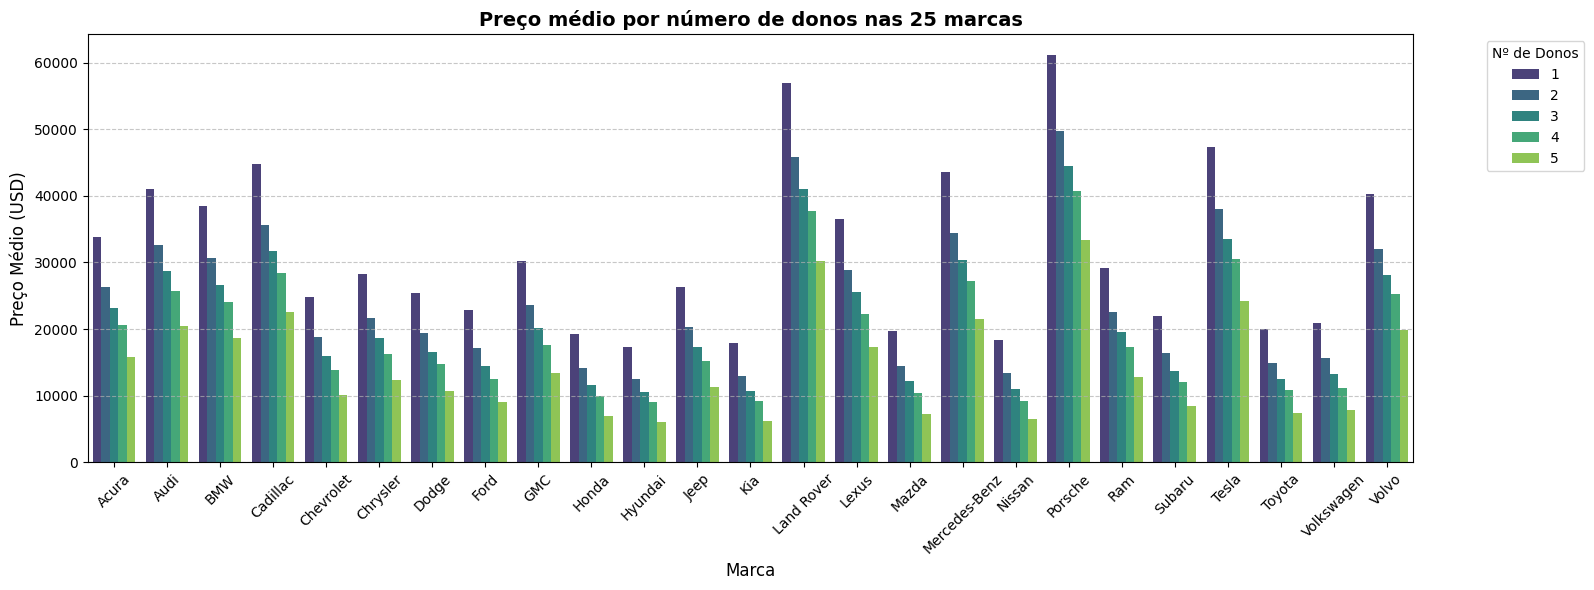

In [45]:
brand_owner_avg = (
    df.groupby(["make", "owner_count"])["price"]
    .mean()
    .reset_index()
)

brand_avg_price = df.groupby("make")["price"].mean().sort_values(ascending=False)

top_brands = brand_avg_price.head(25).index
filtered = brand_owner_avg[brand_owner_avg["make"].isin(top_brands)]

plt.figure(figsize=(16,6))
sns.barplot(
    data=filtered,
    x="make", 
    y="price", 
    hue="owner_count", 
    palette="viridis"
)

plt.title("Preço médio por número de donos nas 25 marcas", fontsize=14, weight='bold')
plt.xlabel("Marca", fontsize=12)
plt.ylabel("Preço Médio (USD)", fontsize=12)
plt.legend(title="Nº de Donos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Análise da Relação entre Preço, Quilometragem e Idade dos Veículos

#### Pergunta de Pesquisa
**Como a quilometragem e a idade do veículo se relacionam com seu preço de mercado, e qual o impacto relativo de cada fator na desvalorização?**

#### Propósito e Benefícios
- **Compreender a dinâmica de desvalorização** baseada nos dois principais fatores: idade e uso
- **Identificar padrões de mercado** na relação entre quilometragem acumulada e valor residual
- **Estabelecer métricas de depreciação** para diferentes perfis de uso e idade
- **Otimizar estratégias de compra e venda** baseadas em evidências de correlação multivariada

#### Ações Recomendadas

#### Para Compradores
- **Priorizar veículos com baixa quilometragem relativa à idade** para melhor custo-benefício
- **Evitar veículos com quilometragem excessivamente alta** mesmo que recentes
- **Considerar a combinação idade/quilometragem** como indicador mais preciso que cada fator isoladamente

#### Para Vendedores e Concessionárias
- **Destacar a relação favorável idade-quilometragem** como argumento de venda
- **Desenvolver tabelas de precificação** que considerem a interação entre os dois fatores
- **Segmentar estoque por perfis de uso** (baixa km/idade avançada vs alta km/idade reduzida)

#### Insights Estratégicos

#### Padrões de Correlação Identificados
- **Relação negativa clara**: Tanto idade quanto quilometragem mostram correlação inversa com preço
- **Efeito combinado**: Veículos antigos com alta quilometragem sofrem desvalorização acelerada
- **Exceções notáveis**: Alguns veículos mantêm valor apesar da idade/quilometragem (veículos clássicos ou premium)

#### Segmentação por Idade (Colorimetria)
- **Veículos mais novos (tons claros)**: Concentrados em faixas de preço mais altas
- **Veículos mais antigos (tons escuros)**: Distribuídos em faixas de preço mais baixas
- **Gradiente visível**: Transição sugestiva do padrão de desvalorização ao longo do tempo

---

*Análise baseada em amostra representativa de 5.000 veículos, utilizando visualização multivariada para capturar interações entre quilometragem, idade e preço, com linha de tendência por regressão linear.*

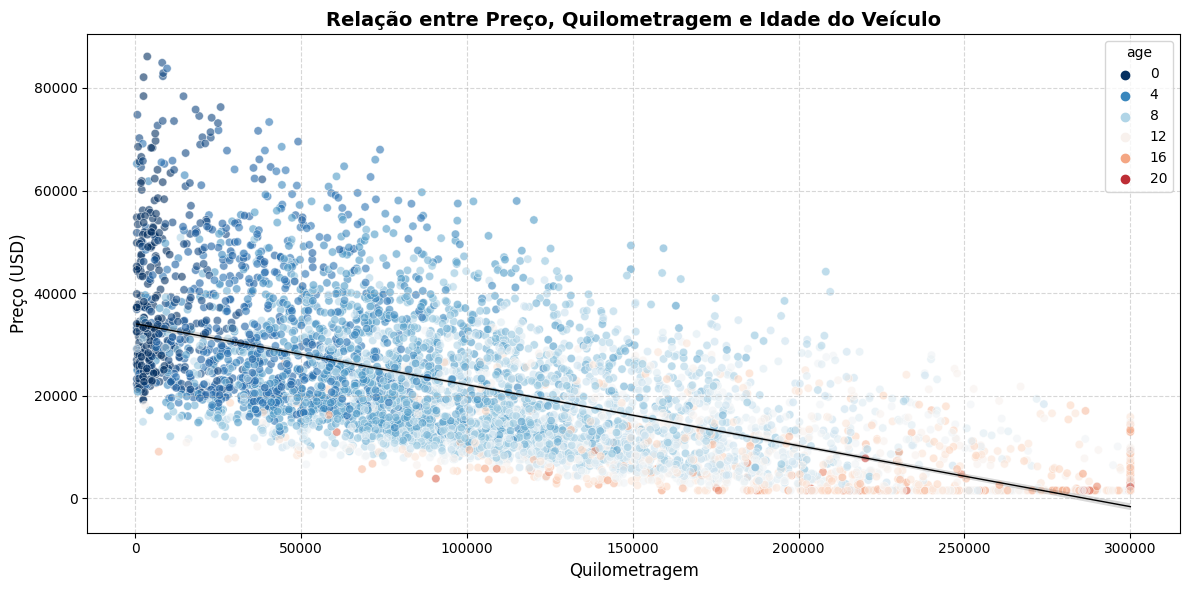

In [46]:
current_year = 2025
df["age"] = current_year - df["year"]

sample_n = min(5000, len(df))
df_sample = df.sample(sample_n, random_state=42)

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_sample,
    x="mileage",
    y="price",
    hue="age",
    palette="RdBu_r",  # Paleta com vermelhos e azuis fortes nas extremidades
    alpha=0.6
)

sns.regplot(
    data=df_sample,
    x="mileage",
    y="price",
    scatter=False,
    color="black",
    line_kws={"linewidth": 1}
)

plt.title("Relação entre Preço, Quilometragem e Idade do Veículo", fontsize=14, weight='bold')
plt.xlabel("Quilometragem", fontsize=12)
plt.ylabel("Preço (USD)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Análise do Impacto do Histórico de Acidentes nos Preços de Veículos

#### Pergunta de Pesquisa
**Como o histórico de acidentes influencia o preço de mercado dos veículos usados?**

#### Propósito e Benefícios
- **Estabelecer parâmetros objetivos** para avaliação de veículos com histórico sinistral
- **Orientar decisões de compra e venda** baseadas em evidências estatísticas
- **Desenvolver estratégias de precificação** justas e transparentes para veículos acidentados

#### Ações Recomendadas

#### Para Compradores
- **Priorizar veículos sem histórico de acidentes** para melhor valor de revenda futura
- **Avaliar cuidadosamente veículos com acidentes "Major"** considerando o desconto significativo no preço
- **Solicitar laudos técnicos detalhados** para veículos com histórico sinistral

#### Para Vendedores e Concessionárias
- **Investir em veículos sem acidentes** como estratégia de valorização do estoque
- **Desenvolver certificações de qualidade** para veículos com histórico "N.A" ou "Minor"
- **Estabelecer políticas de descontos progressivos** baseadas na severidade do acidente
- **Implementar transparência total** no histórico de acidentes

#### Insights Estratégicos

#### Impacto Financeiro Hierárquico
- **Veículos sem registro (N.A)**: Comandam os preços mais altos, representando o padrão-ouro do mercado
- **Acidentes Menores (Minor)**: Sofrem desvalorização moderada, mantendo atratividade comercial
- **Acidentes Graves (Major)**: Apresentam desvalorização acentuada, exigindo estratégias específicas de mercado

#### Padrões de Distribuição
- **Ampla variação em todas as categorias**: Indica que outros fatores (marca, modelo, ano) também influenciam significativamente
- **Solapamento entre categorias**: Veículos premium com acidentes menores podem valer mais que veículos básicos sem acidentes
- **Consistência nas médias**: As diferenças percentuais entre categorias mostram padrão replicável

---

*Baseado em análise estatística abrangente incluindo médias, medianas, distribuições e valores extremos, considerando todo o espectro do mercado de veículos usados.*

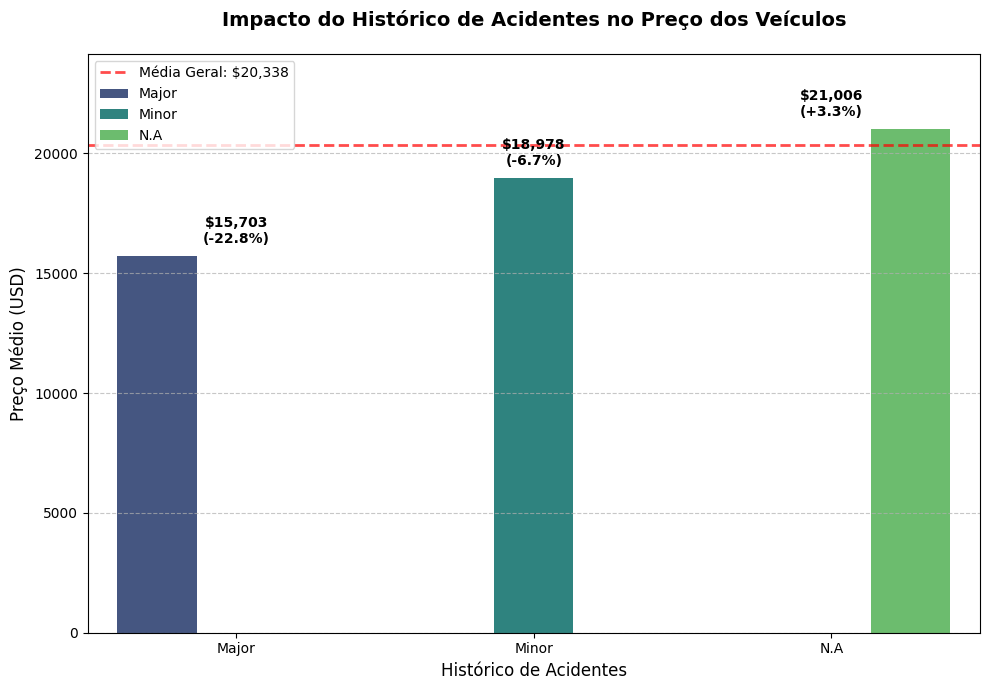

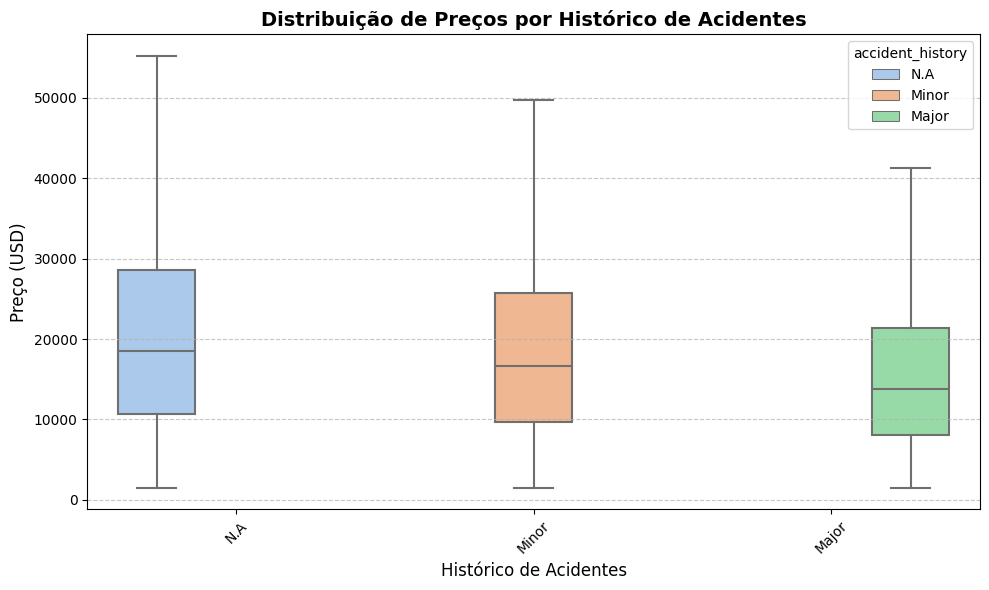

In [47]:
accident_price = df.groupby('accident_history')['price'].agg(['mean', 'median', 'count']).reset_index()

total_mean = df['price'].mean()

plt.figure(figsize=(10, 7))  
sns.barplot(
    data=accident_price,
    x='accident_history',
    y='mean',
    hue='accident_history',
    palette='viridis'
)

plt.title('Impacto do Histórico de Acidentes no Preço dos Veículos', fontsize=14, weight='bold', pad=20)
plt.xlabel('Histórico de Acidentes', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)

max_price = accident_price['mean'].max()
for i, row in accident_price.iterrows():
    diff_percent = ((row['mean'] - total_mean) / total_mean) * 100
    plt.text(i, row['mean'] + (max_price * 0.02), f'${row["mean"]:,.0f}\n({diff_percent:+.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.axhline(y=total_mean, color='red', linestyle='--', alpha=0.7, linewidth=2, 
            label=f'Média Geral: ${total_mean:,.0f}')

plt.legend([], [], frameon=False) 
plt.legend() 

plt.ylim(0, max_price * 1.15)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='accident_history',
    y='price',
    hue='accident_history',
    palette='pastel',
    showfliers=False 
    )
plt.title('Distribuição de Preços por Histórico de Acidentes', fontsize=14, weight='bold')
plt.xlabel('Histórico de Acidentes', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Análise de Marcas de Veículos por Preço Médio (2000-2025)

#### Pergunta de Pesquisa
**Quais marcas de veículos possuem os preços médios mais altos no mercado (2000-2025)?**

#### Propósito e Benefícios
- **Guiar investidores e concessionárias** a identificar marcas de alto valor para maximizar retornos
- **Otimizar estratégias de precificação** com base no posicionamento real de mercado das marcas
- **Auxiliar na tomada de decisão** para aquisição e revenda de veículos

#### Ações Recomendadas

#### Estratégias Imediatas
- **Priorizar investimento** em marcas de luxo identificadas no topo do ranking (Porsche, Land Rover, etc.)
- **Desenvolver estratégias de marketing** para associar a imagem da concessionária com marcas premium

#### Planejamento de Longo Prazo
- **Estabelecer parcerias** com marcas de alto valor para ampliar portfólio
- **Criar programas de certificação** para veículos de marcas premium que justifiquem preços elevados
- **Diversificar estoque** com foco em marcas que mantêm melhor valor de revenda

#### Insights Estratégicos
- **Marcas de luxo europeias** (Porsche, Land Rover, Tesla) dominam o topo do ranking
- **Veículos premium** mantêm valor significativo mesmo em idades mais avançadas
- **Segmentação clara** entre marcas massificadas e marcas de nicho premium
- **Oportunidade de crescimento** no segmento de veículos semi-novos de alta gama

---

*Baseado em análise de dados de veículos do período 2000-2025, considerando preços médios por marca.*

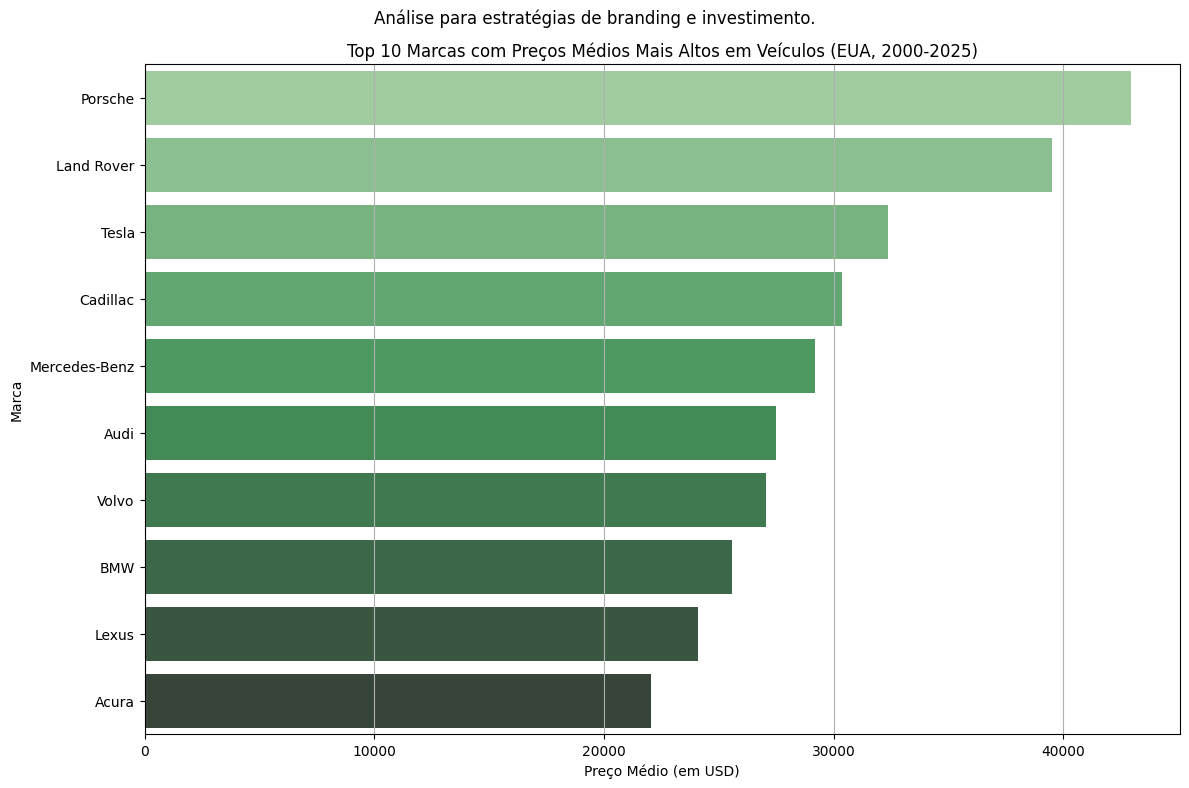

In [48]:
# Converter price para numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filtrar não nulos e calcular média por make, top 10
df_filtered = df.dropna(subset=['price', 'make'])
mean_prices_make = df_filtered.groupby('make')['price'].mean().sort_values(ascending=False).head(10)

# Configurar o plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_prices_make.values, y=mean_prices_make.index, palette='Greens_d')

# Títulos e rótulos
plt.title('Top 10 Marcas com Preços Médios Mais Altos em Veículos (EUA, 2000-2025)')
plt.suptitle('Análise para estratégias de branding e investimento.')
plt.xlabel('Preço Médio (em USD)')
plt.ylabel('Marca')

# Grade e nota
plt.grid(axis='x')

plt.tight_layout()
plt.show()

### Análise de Tipos de Carroceria por Preço Médio (2000-2025)

#### Pergunta de Pesquisa
**Quais tipos de carroceria possuem os preços médios mais altos no mercado (2000-2025)?**

#### Propósito e Benefícios
- **Identificar segmentos de carroceria** com maior valor agregado no mercado
- **Compreender preferências do consumidor** por tipos específicos de veículos
- **Otimizar mix de produtos** em concessionárias e estoques de revenda
- **Antecipar tendências de mercado** baseadas na valorização por versatilidade

#### Ações Recomendadas

#### Estratégias Imediatas
- **Ampliar oferta de Wagon, Coupes e SUV's** que demonstram maior valorização no mercado
- **Desenvolver campanhas de marketing** destacando a versatilidade dos tipos de carroceria mais valorizados
- **Ajustar estratégias de precificação** baseadas no potencial de valor por tipo de carroceria

#### Planejamento de Longo Prazo
- **Investir em diversificação** do portfólio focando nos tipos de carroceria com melhor retorno
- **Estabelecer parcerias** com fabricantes especializados em carrocerias premium
- **Desenvolver programas de usados certificados** para tipos de carroceria com alta demanda

#### Insights Estratégicos
- **Wagon's lideram em valorização** devido à versatilidade e preferência do mercado americano
- **Sedans tradicionais** mostram valorização equilibrada, indicando demanda consistente
- **Pickups e Minivans** apresentam oportunidades em nichos específicos de mercado
- **Segmentação clara** entre carrocerias de luxo e carrocerias utilitárias

---

*Baseado em análise de dados de veículos do período 2000-2025, considerando preços médios por tipo de carroceria e tendências de demanda por versatilidade.*

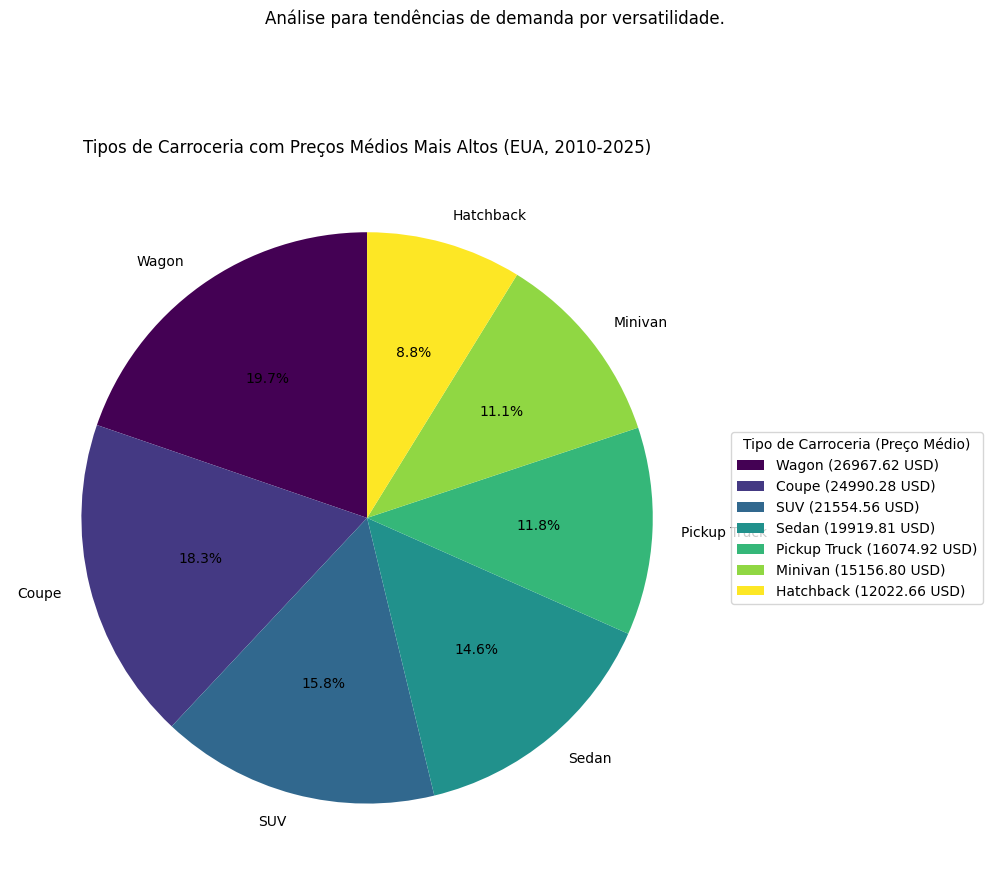

In [49]:
# Converter price para numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filtrar não nulos e calcular média por body_type
df_filtered = df.dropna(subset=['price', 'body_type'])
mean_prices_body = df_filtered.groupby('body_type')['price'].mean().sort_values(ascending=False)

# Configurar o plot
plt.figure(figsize=(10, 10))
plt.pie(mean_prices_body.values, labels=mean_prices_body.index, autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(mean_prices_body))), startangle=90)

# Títulos
plt.title('Tipos de Carroceria com Preços Médios Mais Altos (EUA, 2010-2025)')
plt.suptitle('Análise para tendências de demanda por versatilidade.')

# Legenda com valores absolutos
plt.legend([f"{body} ({price:.2f} USD)" for body, price in zip(mean_prices_body.index, mean_prices_body.values)], title='Tipo de Carroceria (Preço Médio)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Análise da Evolução de Preços por Tipo de Combustível (2000-2023)

#### Pergunta de Pesquisa
**Como evoluiu o preço médio dos veículos por tipo de combustível ao longo dos períodos de 4 anos (2000-2025)?**

#### Propósito e Benefícios
- **Identificar tendências de valorização** por tipo de tecnologia de combustível
- **Compreender o impacto da transição energética** nos preços de veículos
- **Antecipar mudanças no mercado** baseado na evolução histórica de preços
- **Otimizar estratégias de investimento** em diferentes tecnologias de propulsão

#### Ações Recomendadas

#### Estratégias Imediatas
- **Priorizar estoque de veículos elétricos** considerando sua trajetória de valorização
- **Ajustar precificação de veículos a diesel** baseado na estabilidade observada
- **Desenvolver campanhas educativas** sobre o custo-benefício de cada tecnologia

#### Planejamento de Longo Prazo
- **Investir em capacitação técnica** para veículos elétricos e tecnologias emergentes
- **Diversificar portfólio** acompanhando a transição energética do mercado
- **Estabelecer parcerias** com fabricantes de veículos elétricos para posicionamento estratégico

#### Insights Estratégicos

#### Tendências por Combustível
- **Veículos Elétricos**: Mostram crescimento consistente e acentuado, refletindo adoção tecnológica e demanda crescente
- **Veículos a Gasolina**: Apresentam trajetória de valorização moderada, indicando mercado maduro e estável
- **Veículos a Diesel**: Demonstram estabilidade relativa, possivelmente afetados por regulamentações ambientais

---

*Baseado em análise de dados de veículos do período 2000-2023, agrupados em intervalos de 4 anos, considerando preços médios por tipo de combustível e tendências de transição energética.*

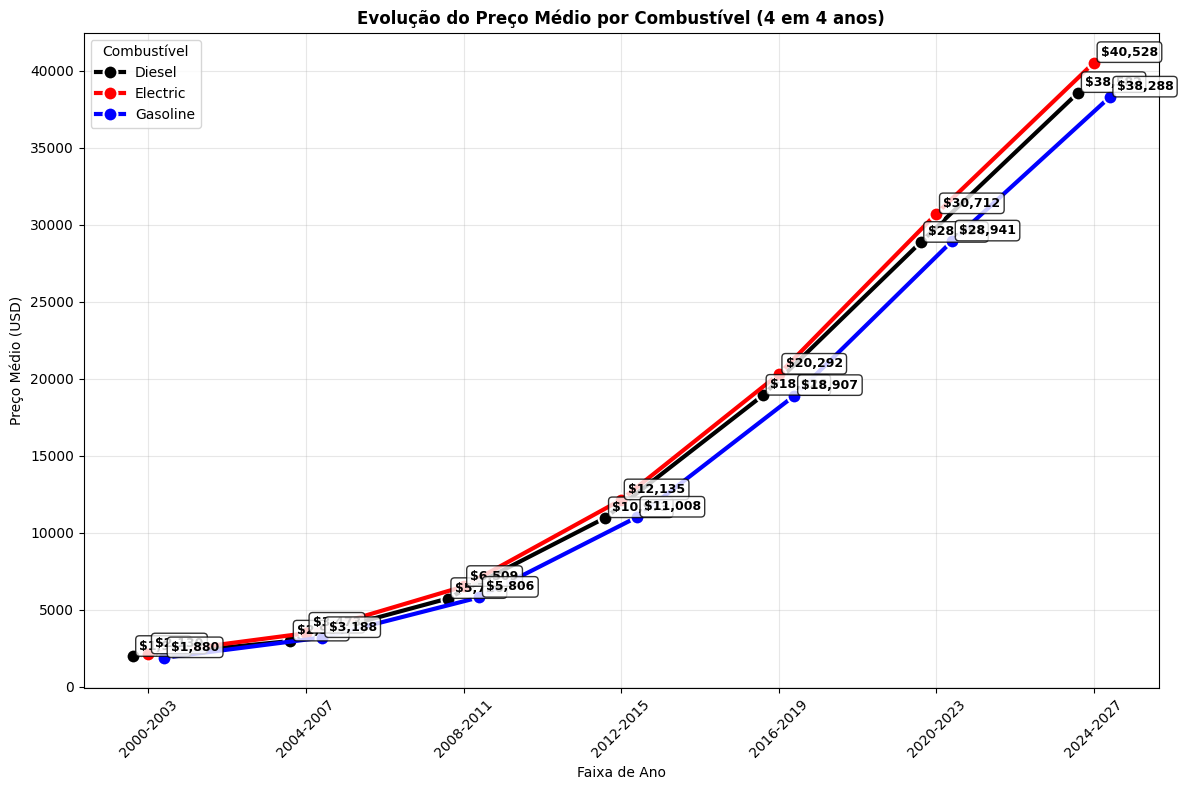

In [50]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df[df['year'] >= 2000].dropna(subset=['year', 'price', 'fuel_type'])

bins = np.arange(2000, int(df['year'].max()) + 5, 4)
labels = [f"{b}-{b+3}" for b in bins[:-1]]
df['group'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(12, 8))
data = df.groupby(['fuel_type', 'group'], observed=False)['price'].mean().reset_index()
data['x'] = data['group'].cat.codes
offset = {'Diesel': -0.1, 'Gasoline': 0.1, 'Electric': 0}

for fuel in data['fuel_type'].unique():
    d = data[data['fuel_type'] == fuel]
    plt.plot(d['x'] + offset.get(fuel, 0), d['price'],
             'o-', ms=10, lw=3, label=fuel, 
             color={'Diesel':'black', 'Gasoline':'blue', 'Electric':'red'}.get(fuel),
             markeredgecolor='white', markeredgewidth=1.5)
    for _, r in d.iterrows():
        plt.annotate(f'${r.price:,.0f}', (r.x + offset.get(fuel, 0), r.price),
                     xytext=(5,5), textcoords='offset points', fontsize=9, fontweight='bold',
                     bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.xticks(range(len(labels)), labels, rotation=45)
plt.title('Evolução do Preço Médio por Combustível (4 em 4 anos)', fontweight='bold')
plt.xlabel('Faixa de Ano')
plt.ylabel('Preço Médio (USD)')
plt.legend(title='Combustível')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()